<a href="https://colab.research.google.com/github/gayatritapule/Butterworth-high-pass-filter/blob/main/Gayatri7B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-16f6e7a74601>:29: RuntimeWarning: divide by zero encountered in divide
  filter = 1 / (1 + (cutoff / distance)**(2 * order))


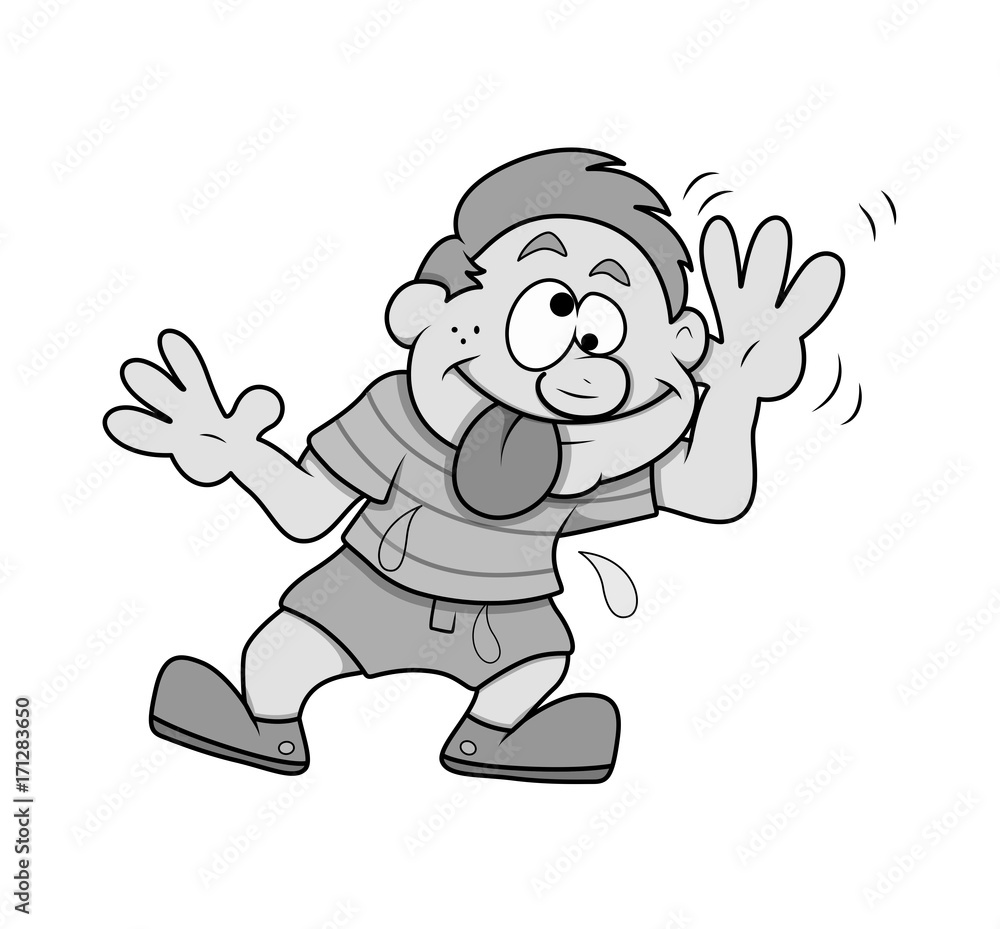

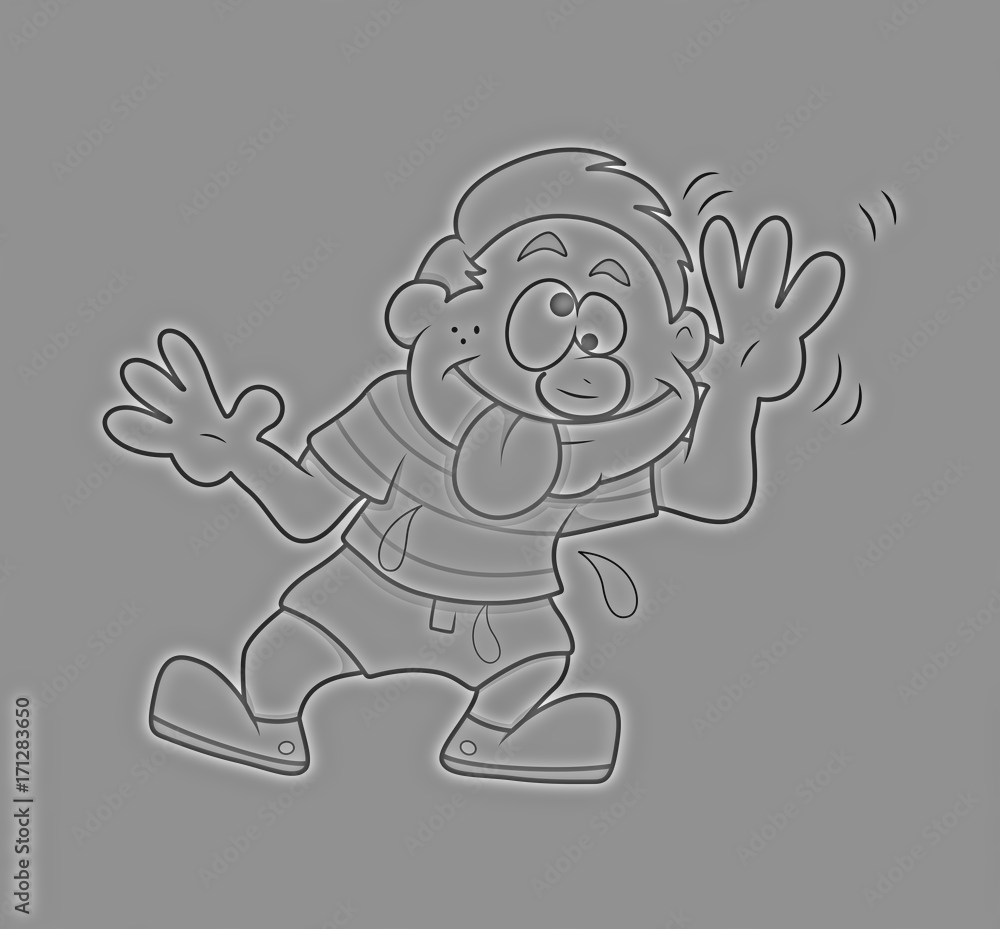

In [ ]:
import numpy as np
import cv2
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2
from google.colab.patches import cv2_imshow

def butterworth_highpass_filter(shape, cutoff, order):
    """
    Creates a Butterworth high-pass filter.

    Args:
        shape (tuple): Shape of the filter (rows, cols).
        cutoff (int): Cutoff frequency.
        order (int): Filter order.

    Returns:
        ndarray: Butterworth high-pass filter.
    """

    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2

    # Create meshgrid for filter coordinates
    x, y = np.meshgrid(np.arange(cols) - center_col, np.arange(rows) - center_row)

    # Calculate distance from center
    distance = np.sqrt(x**2 + y**2)

    # Create Butterworth high-pass filter
    filter = 1 / (1 + (cutoff / distance)**(2 * order))

    return filter


def apply_filter(image, filter):
    """
    Applies a filter to an image in the frequency domain.

    Args:
        image (ndarray): Input image.
        filter (ndarray): Filter to apply.

    Returns:
        ndarray: Filtered image.
    """

    # Perform 2D FFT on the image
    image_fft = fft2(image)

    # Shift zero frequency component to the center
    shifted_fft = fftshift(image_fft)

    # Apply filter in the frequency domain
    filtered_fft = shifted_fft * filter

    # Shift zero frequency component back to the top left corner
    unshifted_fft = ifftshift(filtered_fft)

    # Perform inverse 2D FFT to get the filtered image
    filtered_image = ifft2(unshifted_fft)

    # Take the real part of the result
    filtered_image = np.real(filtered_image)

    return filtered_image

# ... (rest of your functions remain the same) ...

# Load image in grayscale
image = cv2.imread('/content/coolboy.jpg', cv2.IMREAD_GRAYSCALE)

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
    # You might want to exit or handle the error in another way here
else:
    # Define Butterworth high-pass filter parameters
    cutoff = 30  # Cutoff frequency
    order = 2    # Filter order

    # Create Butterworth high-pass filter
    filter = butterworth_highpass_filter(image.shape, cutoff, order)

    # Apply filter to image
    filtered_image = apply_filter(image, filter)

    # Normalize and convert to uint8
    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
    filtered_image = np.uint8(filtered_image)

    # Save or display the result
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()